In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import random
import math

## Метод серединных квадратов (фон Нейман)

In [2]:
def mean_q(start,steps):    
    base = []
    len_ = len(str(start))
    for i in range(steps):
        start = str(start*start)
        new_start = ''
        if len(str(start))<2*len_:
            par = 2*len_ - len(str(start))
            start = par*'0'+str(start)
        for j in range(len_):
            new_start = new_start + str(start)[int(j+len_-len_/2)]
        num_in_base = float('0.'+str(start))
        
        
        start = int(new_start)
        base.append(num_in_base)

    return(base)

In [3]:
mean_q(8647,10)

[0.74770609,
 0.59382436,
 0.14622976,
 0.38800441,
 0.64064016,
 0.004096,
 0.16777216,
 0.60403984,
 0.16313521,
 0.09828225]

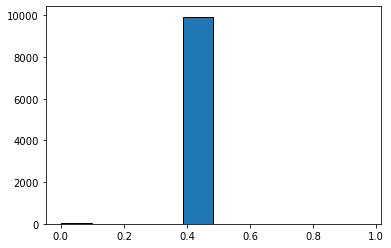

In [4]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot()
ax.hist(mean_q(276506,10000), edgecolor='black')
!

## Линейный конгруэнтный датчик случайных чисел

In [5]:
def kongurent_q(r,k,b,step):  
    base = [float("0."+str(r))]
    len_ = len(str(r))
    par = 10**len_
    for i in range(step):
        r = (r*k+b)%par
        base.append(float("0."+str(r)))
    return(base)

In [6]:
kongurent_q(4675,2,3,10)

[0.4675,
 0.9353,
 0.8709,
 0.7421,
 0.4845,
 0.9693,
 0.9389,
 0.8781,
 0.7565,
 0.5133,
 0.269]

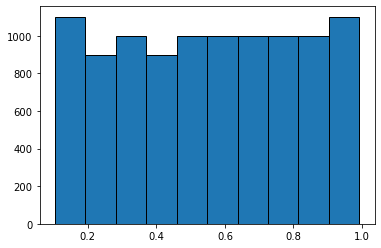

In [7]:
fig = plt.figure()
ax = fig.add_subplot()
ax.hist(kongurent_q(46447,2,3,10000), edgecolor='black')
!

## Метод обратной функции, получить последовательность случайных чисел, распределенных экспоненциально

In [8]:
import random
import math
def exp(lam, step):
    r = random.random()
    base = []
    base_ = []
    for i in range(step):
        r = random.random()
        x = -math.log(r)/lam
        base.append(x)
    return(base)

In [9]:
exp(1, 10)

[0.03857569338981216,
 0.38174810330682607,
 0.4103361599547958,
 1.2714470258839834,
 0.10493340991243127,
 1.4774384426187572,
 0.5012181366868718,
 0.20943088017629466,
 1.6184119043989555,
 0.47314024967989654]

Мат.ожидание: 0.5
Дисперсия: 0.25


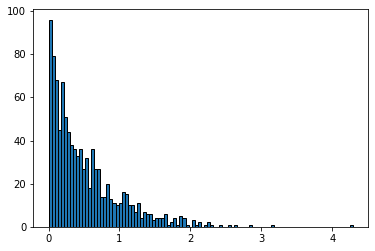

In [10]:
fig = plt.figure()
ax = fig.add_subplot()
lam = 2
ax.hist(exp(lam, 1000), edgecolor='black',bins= 100)
print('Мат.ожидание: '+ str(1/lam))
print('Дисперсия: '+ str(1/lam**2))

## Последовательность случайных чисел, используя преобразование Бокса-Мюллера


In [10]:
def box_mul(step):
    base = []
    for i in range(step):
        r1 = random.random()
        r2 = random.random()
        u_1 = np.cos(2*np.pi*r1)*(-2*math.log(r2))**(0.5)
        u_2 = np.sin(2*np.pi*r1)*(-2*math.log(r2))**(0.5)
        base.append((r1+r2+u_1+u_2-2))
    return base

In [11]:
box_mul(10)

[-3.6921454222330663,
 -1.8775003090056337,
 -4.915788268247838,
 0.783284243808116,
 -3.0829563475008652,
 -1.3145114181597921,
 0.2052488328078632,
 -0.5515850478942055,
 0.1058331971043498,
 1.10025077029771]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

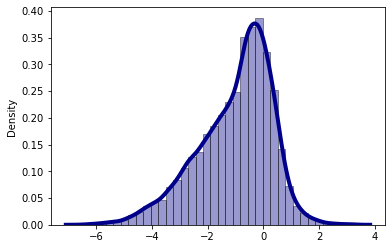

In [66]:
sns.distplot(box_mul(10000), hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

## Нормальное распределение

In [13]:
def norm_raspr(step, n):
    base = []
    for i in range(step):
        base_ = [random.random() for j in range(n)]
        summ = sum(base_)
        base.append(((12/step)**0.5)*(summ - step/2))
    return base

In [14]:
norm_raspr(10,10)

[-1.0872571347216766,
 0.24659761542188988,
 0.895881107308047,
 0.596308771733662,
 0.7408008752527243,
 0.7220695204580165,
 -1.494467231572738,
 -0.9281897281200876,
 0.1425159521048121,
 0.36192780571988825]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

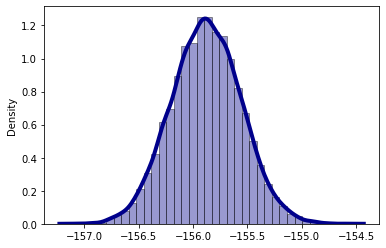

In [71]:
sns.distplot(norm_raspr(10000, 1000), hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

## Треугольное распределение

In [59]:
def tring_raspr(a,c,b, step):
    base = []
    for i in range(int(step/2)):
        r = random.random()
        base.append((2*b - r*(b-a)*(b-c))/2)
        base.append((r*(b-a)*(c-a)+2*a)/2)
    return base

In [68]:
tring_raspr(1,7,10, 10)

[0.7574521219664287,
 19.485095756067143,
 7.64282590728086,
 5.714348185438279,
 1.5677385279406657,
 17.86452294411867,
 1.696462366396915,
 17.60707526720617,
 3.5110487435415454,
 13.97790251291691]

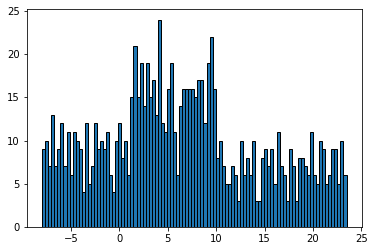

In [73]:
fig = plt.figure()
ax = fig.add_subplot()
ax.hist(tring_raspr(1,6,10, 1000), edgecolor='black',bins= 100)
!

## Метод Монте-Карло

In [95]:
def Monte_Carlo(step):
    base = []
    for i in range(step):
        num_pos = 0
        for i in range(i+1):
            x = random.random()
            y = random.random()
            if y<=math.sin(np.pi * x):
                num_pos = num_pos + 1
        base.append(num_pos/(i+1))
    return base

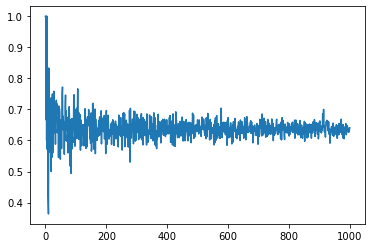

In [98]:
plt.plot(Monte_Carlo(1000))

## Метод статистических испытаний

In [ ]:
def stat_test(step):
    pass